-Cilj ovog projekta je klasifikacija, tacnije predvidjanje uspesnosti studenata. Obradom razlicitih podataka (npr. podaci o roditeljima ili demografski podaci) cilj je predvidjanje da li je student diplomirao ili je odustao.

// Ucitavanje biblioteka

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

// Ucitavanje podataka

In [86]:
df = pd.read_csv('graduation_dataset.csv')

//Ucitavanje preko drive-a

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# csv_path = "/content/drive/My Drive/csv_VI/graduation_dataset.csv"
# df = pd.read_csv(csv_path)

// Prikaz glave dataset-a

In [87]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


// Prikaz repa dataset-a

In [88]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


// Prikaz informacija

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

// Iz ovog prikaza vidimo da su nam svi podaci brojne vrednosti (osim Target kolone), i da nigde ne fale podaci.

// Jos jedna provera da li postoje vrednosti koje nedostaju

In [90]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

// Prikaz srednjig vrednosti i kvartila po kolonama

In [91]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [95]:
print("Broj kolona u dataset-u: %d \n" % df.shape[1])
print("Broj redova u dataset-u: %d \n" % df.shape[0])

Broj kolona u dataset-u: 35 

Broj redova u dataset-u: 4424 



// Izbacujemo iz dataset-a podatke za studente koji jos uvek studiraju

In [96]:
df = df[df .Target != 'Enrolled']

In [98]:
print("Broj redova u dataset-u: %d \n" % df.shape[0])

Broj redova u dataset-u: 3630 



In [99]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

<Axes: title={'center': 'Pie prikaz target vrednosti'}, ylabel='Target'>

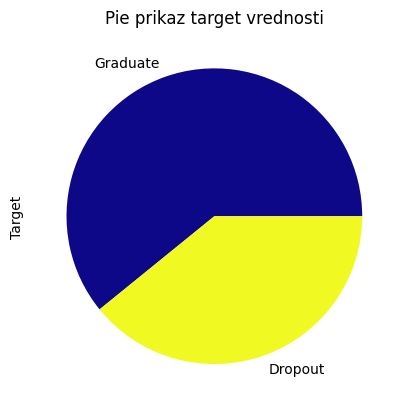

In [102]:
df['Target'].value_counts().plot(kind = 'pie', title = 'Pie prikaz target vrednosti', cmap = 'plasma')

<Axes: title={'center': 'Bar prikaz target vrednosti'}>

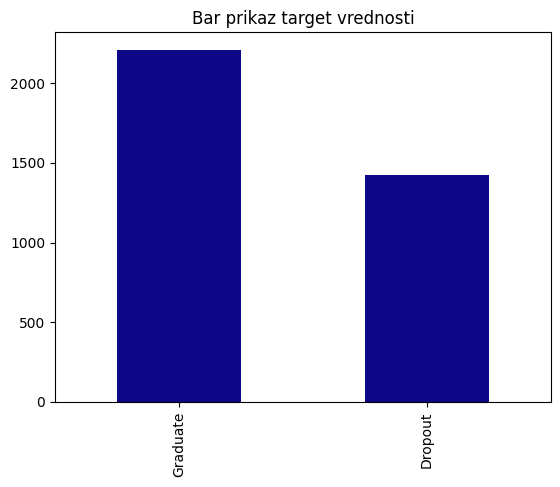

In [103]:
df['Target'].value_counts().plot(kind = 'bar', title = 'Bar prikaz target vrednosti', cmap = 'plasma')

// Enkodovanje Target podataka

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encoder = LabelEncoder()

In [107]:
df['Target'] = encoder.fit_transform(df['Target'])

// formiranje i prikaz korelacione matrice

In [108]:
corr_matrix = df.corr()

In [109]:
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,-0.122366,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,-0.102795
Nacionality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,0.002243,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,-0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,-0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.045833,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,-0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,0.064195


// Heathmap prikaz korelacione matrice

<Axes: >

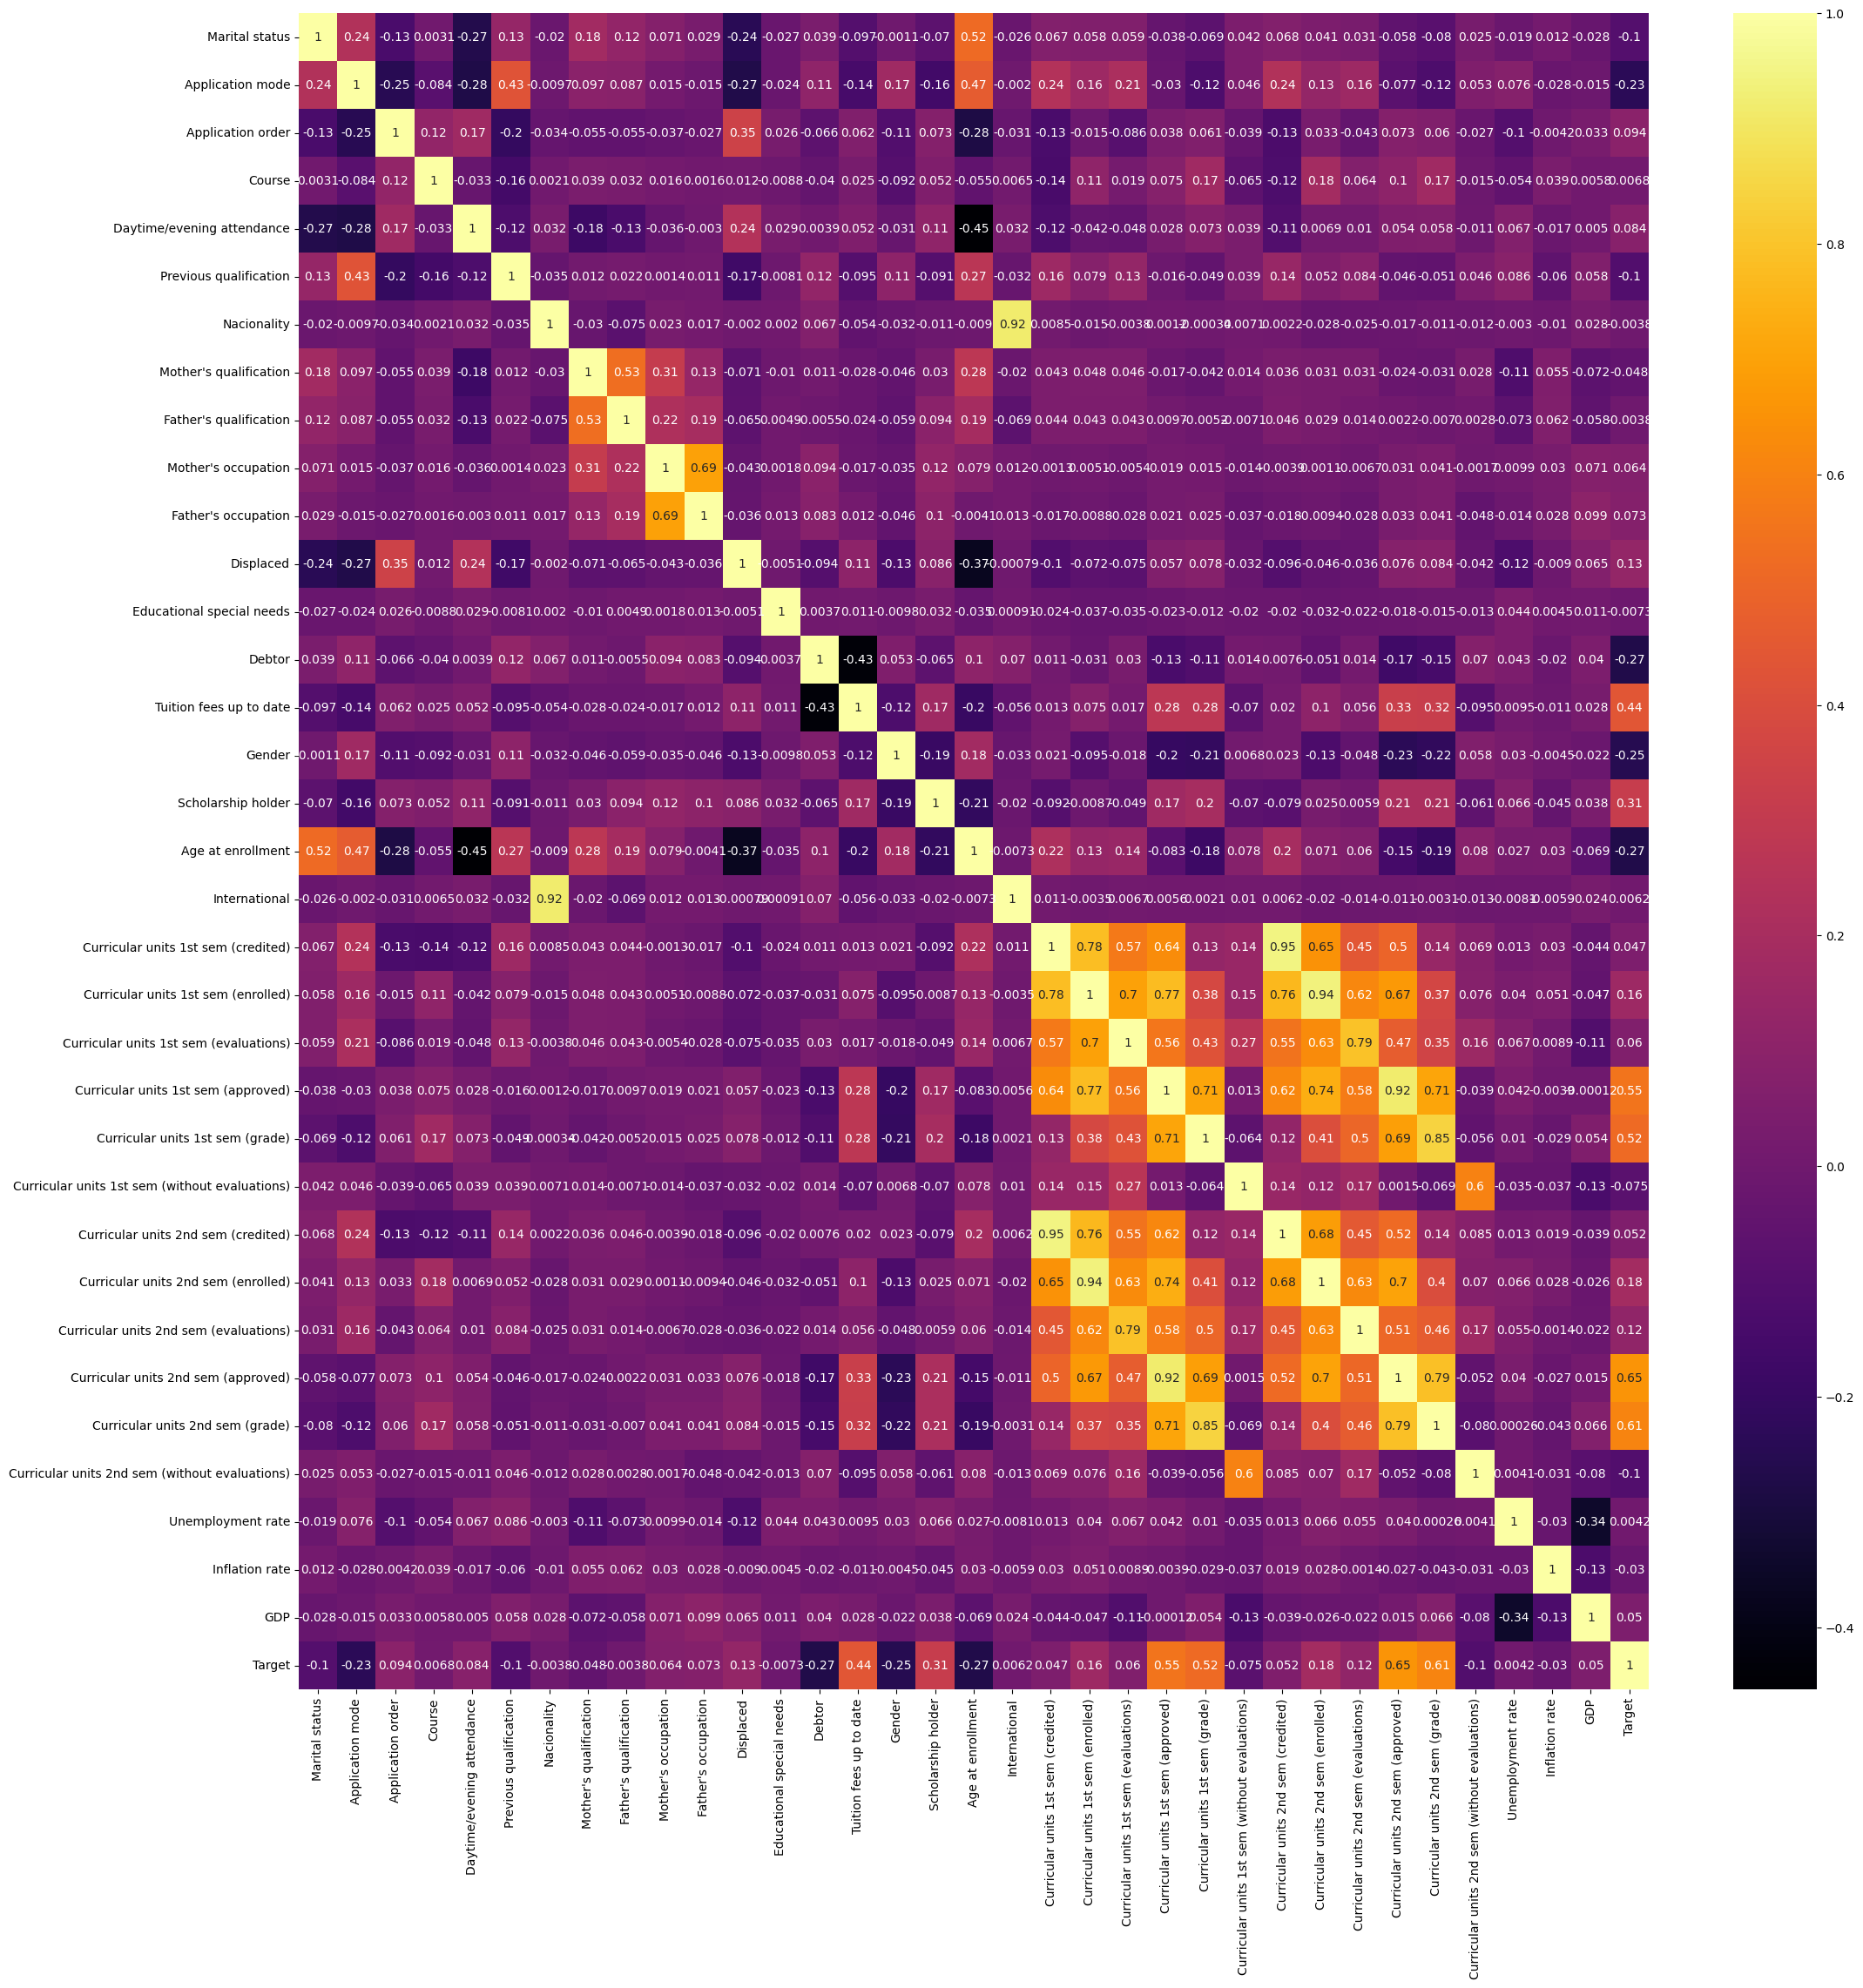

In [112]:
plt.figure(figsize = (25, 25) )
sns.heatmap(corr_matrix, annot = True, cmap = 'inferno')

// izdvajanje Target kolone

In [114]:
dataset = df.drop('Target', axis = 1)

In [115]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


<Axes: title={'center': 'Korelacija ostalih kolona kada je vrednost Target-a "Dropuot"'}>

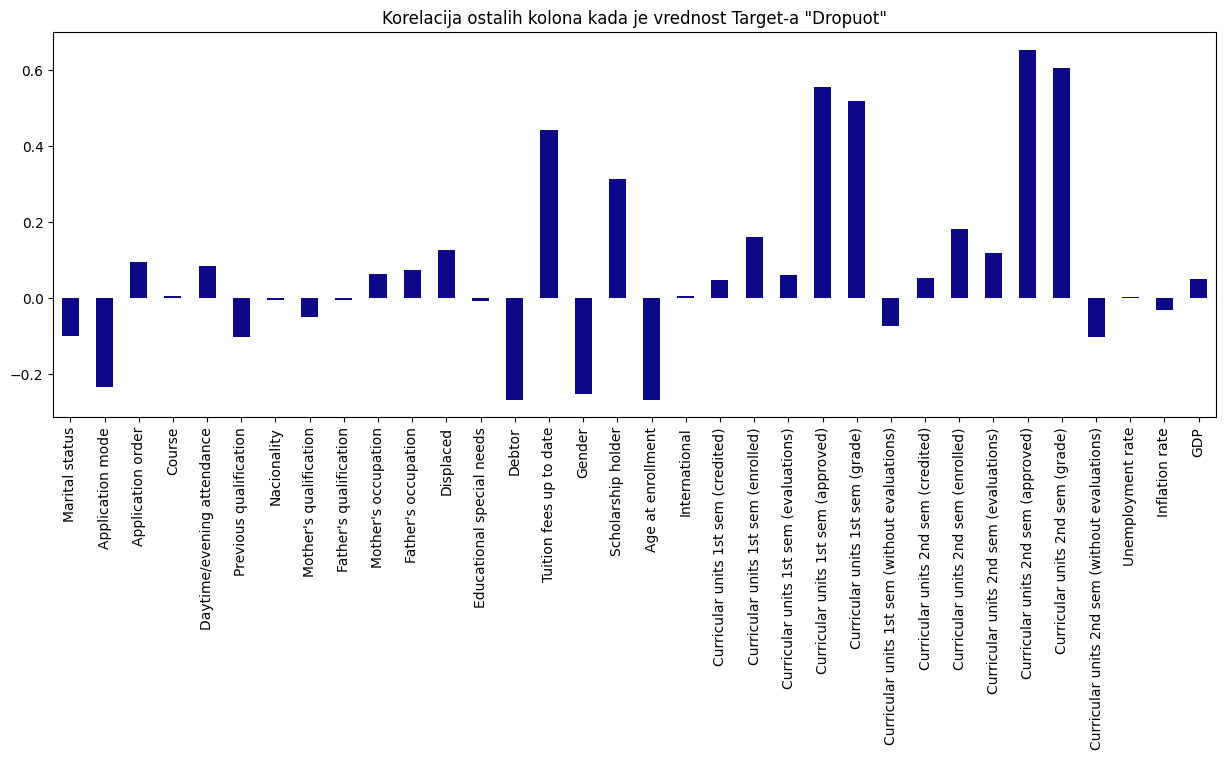

In [133]:
dataset.corrwith(df['Target']).plot.bar(title = 'Korelacija ostalih kolona kada je vrednost Target-a "Dropuot"', figsize = (15, 5), cmap = 'plasma')

// Mozemo da izbacimo kolone cija je korelacija mala

In [137]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [138]:
df.drop(['Course', 'Nacionality', "Father's qualification", 'Educational special needs', 'International', 'Curricular units 1st sem (credited)',
         'Curricular units 2nd sem (credited)', 'Unemployment rate', 'Inflation rate'], axis = 1, inplace = True)

In [140]:
df.columns

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP', 'Target'],
      dtype='object')

<Axes: title={'center': 'Korelacija ostalih kolona kada je vrednost Target-a "Dropuot"'}>

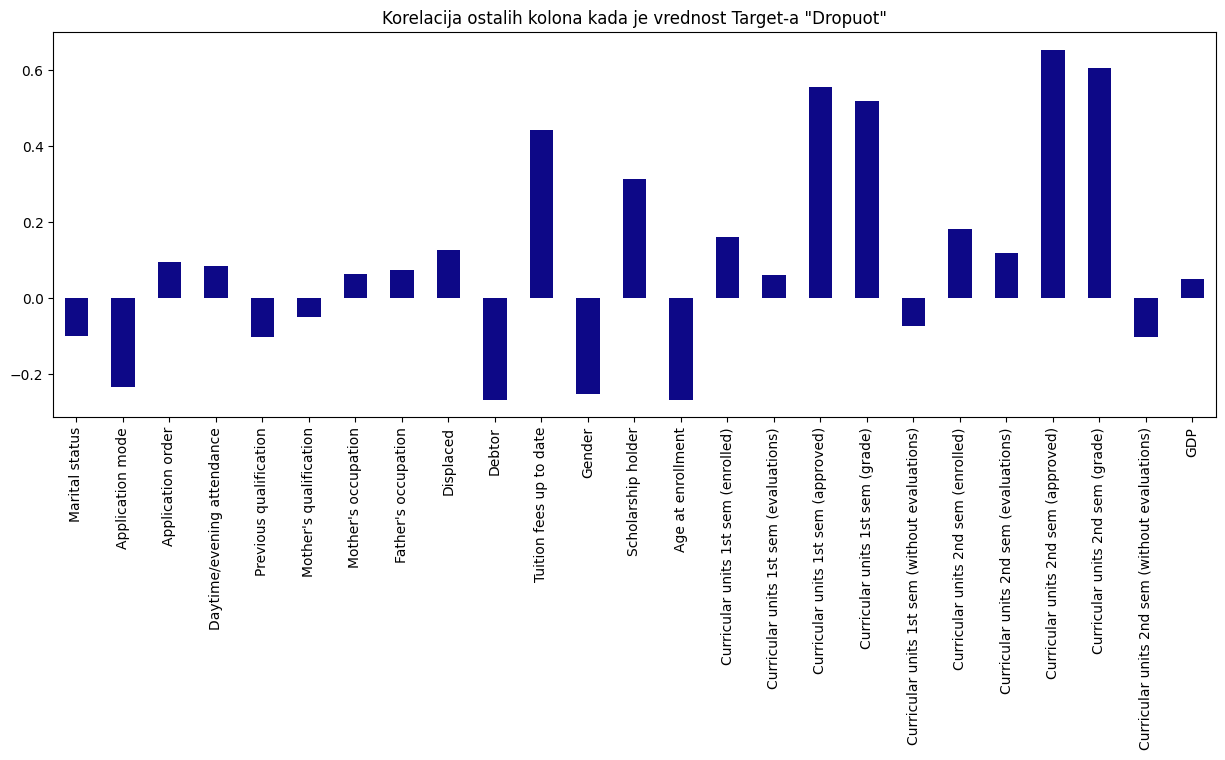

In [142]:
dataset = df.drop('Target', axis = 1)
dataset.corrwith(df['Target']).plot.bar(title = 'Korelacija ostalih kolona kada je vrednost Target-a "Dropuot"', figsize = (15, 5), cmap = 'plasma')

// Priprema podataka za modelovanje

In [144]:
features = df.drop('Target', axis = 1)
target = df['Target']

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [308]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, stratify = target, random_state = 42)

In [309]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2541, 25), (1089, 25), (2541,), (1089,))

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
scaler = StandardScaler()

In [312]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

// Kako je u pitanju klasifikacija, odabrao sam random forest classifier model
// Rezultati tacnosti koje sam dobio koristeci druge modele su manji ili jednaki ovom.

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
rcf_model = RandomForestClassifier()

In [315]:
rcf_model.fit(X_train, y_train)

RandomForestClassifier()

In [316]:
y_pred = rcf_model.predict(X_test)

// Model daje rezultat tacnosti ~0.91

In [319]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9100091827364555
Confusion Matrix:
 [[347  79]
 [ 19 644]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       426
           1       0.89      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



<Axes: >

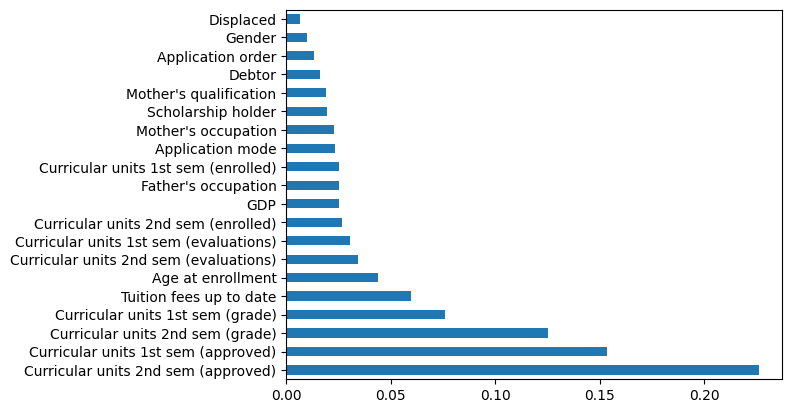

In [320]:
feat_importances = pd.Series(rcf_model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

// Pokusao sam da izdvojim samo kolone koje po grafu najvise uticu na rezultat i da postavim novi model sa njima, ali rezultat nije veci od 0.89 ni u jednoj kombinaciji

In [322]:
new_target = df['Target']
new_features = df[['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
                  'Tuition fees up to date', 'Age at enrollment']].copy()

In [335]:
X_train, X_test, y_train, y_test = train_test_split(new_features, new_target, test_size = 0.5, stratify = target, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [336]:
y_pred = model.predict(X_test)
new_accuracy = accuracy_score(y_test, y_pred)
new_conf_matrix = confusion_matrix(y_test, y_pred)
new_report = classification_report(y_test, y_pred)

print("Accuracy:", new_accuracy)
print("Confusion Matrix:\n", new_conf_matrix)
print("Classification Report:\n", new_report)

Accuracy: 0.8848484848484849
Confusion Matrix:
 [[ 584  127]
 [  82 1022]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       711
           1       0.89      0.93      0.91      1104

    accuracy                           0.88      1815
   macro avg       0.88      0.87      0.88      1815
weighted avg       0.88      0.88      0.88      1815

